<h3><center>Alexandra Almeida</center></h3> 
<h1><center>Project "Green Chillies Prices in India"</center></h1>
<img src="https://upskill.pt/wp-content/uploads/2020/03/cropped-APDC_UPSKILLS_Logo-300x83.png" width="200" align="center">

The present project was carried out under the Machine Learning module as part of the UpsKill program.

I have select a public dataset which contains a time list of chili peppers prices in India over 2048 days. The goal is to forecast prices for next 90 days.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
# import excel file and convert into pandas
df = pd.read_csv('Chillies Prices in India.csv', delimiter=';')
df.head()

,datesk,Item Name,Date,price
0,20110101,Chillies Green,01/01/2011,NaN
1,20110101,Chillies Bajji,01/01/2011,NaN
2,20110101,Chillies Cleaned,01/01/2011,NaN
3,20110101,Chillies small (C.B.P),01/01/2011,NaN
4,20110101,Chillies Bajji yagani,01/01/2011,NaN


In [3]:
# check dataframe'shape
df.shape

(13065, 4)

In [4]:
# keep green chillies data only 
df = df[(df['Item Name']== 'Chillies Green')]
df.shape

(2613, 4)

In [5]:
#drop missing values
df.dropna(inplace=True)

In [6]:
#convert the 'Date' column into a datetime format so that it can interpreted as a date
df['Date'] = pd.to_datetime(df['datesk'], format="%Y%m%d")
df.head()

,datesk,Item Name,Date,price
339,20110309,Chillies Green,2011-03-09,30.0
340,20110310,Chillies Green,2011-03-10,30.0
360,20110314,Chillies Green,2011-03-14,30.0
370,20110316,Chillies Green,2011-03-16,30.0
378,20110317,Chillies Green,2011-03-17,30.0


In [7]:
# remove column 'datesk' and 'Item Name'
df.drop(columns = ['datesk','Item Name'], inplace=True)

In [8]:
# remove rows where price is 0
df = df[~(df['price']== 0)]
df.reset_index(drop=True, inplace=True)
df.shape

(2048, 2)

In [9]:
# get the general descriptive statistics from data
df.describe()

,price
count,2048.000000
mean,35.721191
std,21.060151
min,16.000000
25%,25.000000
50%,30.000000
75%,40.000000
max,598.000000


After cleaning all columns and rows not needed, we can plot the data and visualize the prices evolution. We can see 2 data points where prices were much higher than usual.

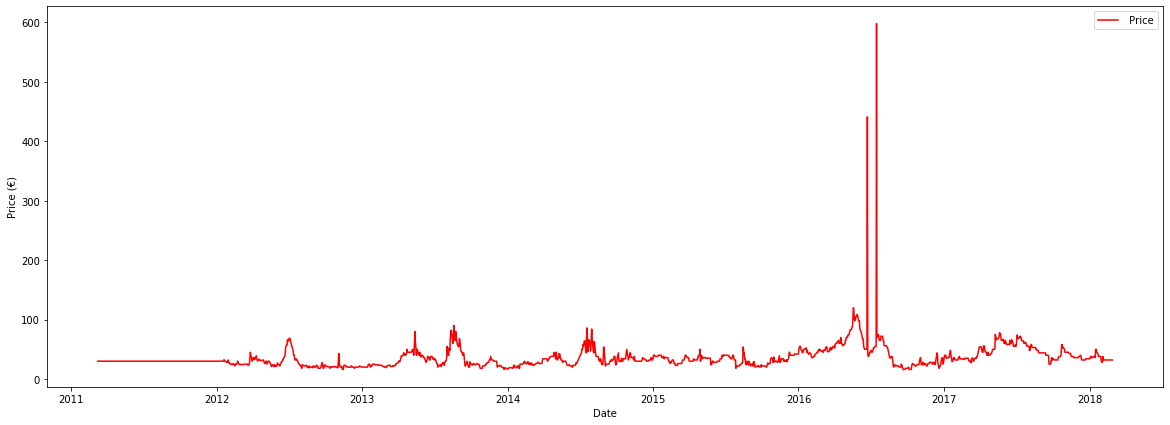

In [10]:
#sort data from older to newer prices
df.sort_values(by=['Date'], ascending = True, inplace = True)

# creating a pot in order to visualize the price evolution.
plt.figure(figsize=(20,7))
plt.plot(df['Date'].values, df['price'].values, label = ' Price', color = 'red')
# plt.xticks(np.arange(100,df.shape[0],100))
plt.xlabel('Date')
plt.ylabel('Price (€)')
plt.legend()
plt.show()

In [11]:
# sort the dataframe by descending price in order to find the 2 outlier prices
df.sort_values(by=['price'], ascending=False)

,Date,price
1592,2016-07-15,598.0
1574,2016-06-22,441.0
1544,2016-05-18,120.0
1545,2016-05-19,115.0
1551,2016-05-26,108.0
...,...,...
1649,2016-10-07,16.0
1648,2016-10-06,16.0
1638,2016-09-22,16.0
1639,2016-09-24,16.0


In [12]:
#remove prices values 598.0 and 441.0
outliers = df.index[[1574,1592]]
df.drop(outliers, inplace=True)

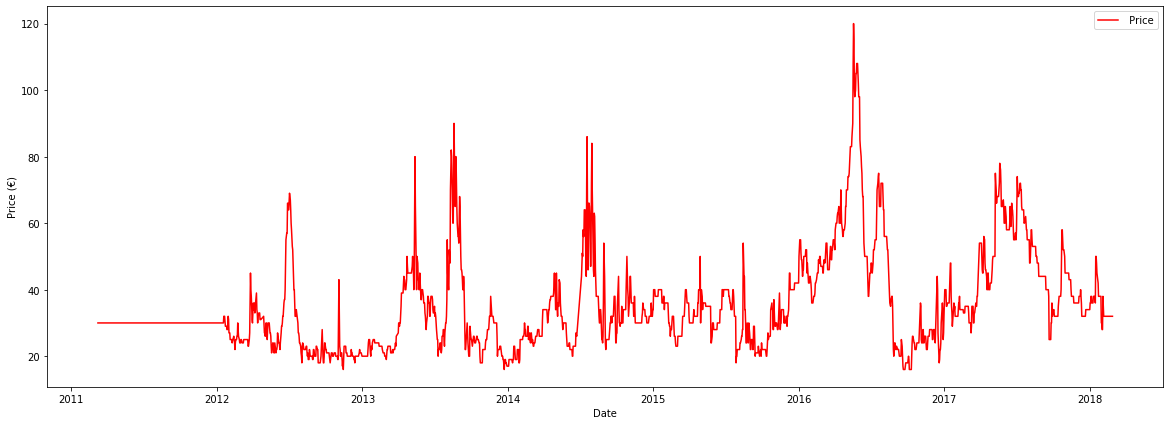

In [13]:
#Create a new plot without ouliers
plt.figure(figsize=(20,7))
plt.plot(df['Date'].values, df['price'].values, label = ' Price', color = 'red')
# plt.xticks(np.arange(100,df.shape[0],200))
plt.xlabel('Date')
plt.ylabel('Price (€)')
plt.legend()
plt.show()

## LSTM

In [14]:
# split the ordered dataset into train and test datasets
# 80% of the number of records for training
num_records = round(len(df)*0.8)
train = df.iloc[:num_records, 1:2].values
test = df.iloc[num_records:, 1:2].values

Scaling features using normalization. 

In [15]:
# Normalize the data using MinMax method
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_scaled = sc.fit_transform(train)

Now we take one row and cut it with a window of 30 elements

In [16]:
X_train = []

#Price on next day
y_train = []

window = 30

for i in range(window, num_records):
    X_train_ = np.reshape(train_scaled[i-window:i, 0], (window, 1))
    X_train.append(X_train_)
    y_train.append(train_scaled[i, 0])
    
X_train = np.stack(X_train)
y_train = np.stack(y_train)

Training the model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.layers import *

# Initializing the Recurrent Neural Network
model = Sequential()
#Adding the first LSTM layer with a sigmoid activation function and some Dropout regularization
#Units - dimensionality of the output space

model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 30, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

Fit the model

In [18]:
model.compile(optimizer = 'adam', loss = 'mse')
model.fit(X_train, y_train, epochs = 500, batch_size = 512);

Epoch 1/500
4/4 [==============================] - 13s 263ms/step - loss: 0.0458
Epoch 2/500
4/4 [==============================] - 1s 258ms/step - loss: 0.0143
Epoch 3/500
4/4 [==============================] - 1s 262ms/step - loss: 0.0149
Epoch 4/500
4/4 [==============================] - 1s 273ms/step - loss: 0.0136
Epoch 5/500
4/4 [==============================] - 1s 265ms/step - loss: 0.0103
Epoch 6/500
4/4 [==============================] - 1s 289ms/step - loss: 0.0108
Epoch 7/500
4/4 [==============================] - 1s 286ms/step - loss: 0.0097
Epoch 8/500
4/4 [==============================] - 1s 272ms/step - loss: 0.0102
Epoch 9/500
4/4 [==============================] - 1s 310ms/step - loss: 0.0088
Epoch 10/500
4/4 [==============================] - 1s 324ms/step - loss: 0.0080
Epoch 11/500
4/4 [==============================] - 1s 293ms/step - loss: 0.0074
Epoch 12/500
4/4 [==============================] - 1s 278ms/step - loss: 0.0070
Epoch 13/500
4/4 [==================

4/4 [==============================] - 1s 260ms/step - loss: 0.0030
Epoch 103/500
4/4 [==============================] - 1s 270ms/step - loss: 0.0031
Epoch 104/500
4/4 [==============================] - 1s 262ms/step - loss: 0.0028
Epoch 105/500
4/4 [==============================] - 1s 264ms/step - loss: 0.0030
Epoch 106/500
4/4 [==============================] - 1s 294ms/step - loss: 0.0027
Epoch 107/500
4/4 [==============================] - 1s 328ms/step - loss: 0.0028
Epoch 108/500
4/4 [==============================] - 1s 291ms/step - loss: 0.0030
Epoch 109/500
4/4 [==============================] - 1s 237ms/step - loss: 0.0030
Epoch 110/500
4/4 [==============================] - 1s 270ms/step - loss: 0.0028
Epoch 111/500
4/4 [==============================] - 1s 235ms/step - loss: 0.0028
Epoch 112/500
4/4 [==============================] - 1s 266ms/step - loss: 0.0030
Epoch 113/500
4/4 [==============================] - 1s 242ms/step - loss: 0.0028
Epoch 114/500
4/4 [===========

4/4 [==============================] - 1s 318ms/step - loss: 0.0027
Epoch 203/500
4/4 [==============================] - 1s 295ms/step - loss: 0.0024
Epoch 204/500
4/4 [==============================] - 1s 283ms/step - loss: 0.0026
Epoch 205/500
4/4 [==============================] - 1s 312ms/step - loss: 0.0025
Epoch 206/500
4/4 [==============================] - 1s 349ms/step - loss: 0.0024
Epoch 207/500
4/4 [==============================] - 1s 347ms/step - loss: 0.0026
Epoch 208/500
4/4 [==============================] - 1s 324ms/step - loss: 0.0025
Epoch 209/500
4/4 [==============================] - 1s 294ms/step - loss: 0.0026
Epoch 210/500
4/4 [==============================] - 1s 338ms/step - loss: 0.0025
Epoch 211/500
4/4 [==============================] - 1s 313ms/step - loss: 0.0025
Epoch 212/500
4/4 [==============================] - 2s 365ms/step - loss: 0.0027
Epoch 213/500
4/4 [==============================] - 1s 316ms/step - loss: 0.0026
Epoch 214/500
4/4 [===========

4/4 [==============================] - 1s 272ms/step - loss: 0.0022
Epoch 303/500
4/4 [==============================] - 1s 293ms/step - loss: 0.0019
Epoch 304/500
4/4 [==============================] - 1s 292ms/step - loss: 0.0020
Epoch 305/500
4/4 [==============================] - 1s 350ms/step - loss: 0.0020
Epoch 306/500
4/4 [==============================] - 1s 280ms/step - loss: 0.0017
Epoch 307/500
4/4 [==============================] - 1s 286ms/step - loss: 0.0021
Epoch 308/500
4/4 [==============================] - 1s 270ms/step - loss: 0.0021
Epoch 309/500
4/4 [==============================] - 1s 289ms/step - loss: 0.0019
Epoch 310/500
4/4 [==============================] - 1s 300ms/step - loss: 0.0020
Epoch 311/500
4/4 [==============================] - 1s 313ms/step - loss: 0.0020
Epoch 312/500
4/4 [==============================] - 1s 336ms/step - loss: 0.0020
Epoch 313/500
4/4 [==============================] - 1s 289ms/step - loss: 0.0019
Epoch 314/500
4/4 [===========

4/4 [==============================] - 1s 339ms/step - loss: 0.0014
Epoch 403/500
4/4 [==============================] - 1s 262ms/step - loss: 0.0015
Epoch 404/500
4/4 [==============================] - 1s 258ms/step - loss: 0.0015
Epoch 405/500
4/4 [==============================] - 1s 243ms/step - loss: 0.0016
Epoch 406/500
4/4 [==============================] - 1s 258ms/step - loss: 0.0017
Epoch 407/500
4/4 [==============================] - 1s 285ms/step - loss: 0.0015
Epoch 408/500
4/4 [==============================] - 1s 266ms/step - loss: 0.0018
Epoch 409/500
4/4 [==============================] - 1s 257ms/step - loss: 0.0016
Epoch 410/500
4/4 [==============================] - 1s 267ms/step - loss: 0.0015
Epoch 411/500
4/4 [==============================] - 1s 262ms/step - loss: 0.0015
Epoch 412/500
4/4 [==============================] - 1s 262ms/step - loss: 0.0017
Epoch 413/500
4/4 [==============================] - 1s 264ms/step - loss: 0.0017
Epoch 414/500
4/4 [===========

## Prediction

In [19]:
df_volume = np.vstack((train, test))

inputs = df_volume[df_volume.shape[0] - test.shape[0] - window:]
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

num_2 = df_volume.shape[0] - num_records + window

X_test = []

for i in range(window, num_2):
    X_test_ = np.reshape(inputs[i-window:i, 0], (window, 1))
    X_test.append(X_test_)
    
X_test = np.stack(X_test)

In [20]:
predict = model.predict(X_test)
predict = sc.inverse_transform(predict)
len(predict)

409

In [21]:
diff = predict - test

print("MSE:", np.mean(diff**2))
print("MAE:", np.mean(abs(diff)))
print("RMSE:", np.sqrt(np.mean(diff**2)))

MSE: 12.605022634053064
MAE: 2.0987948998262365
RMSE: 3.5503552827925637


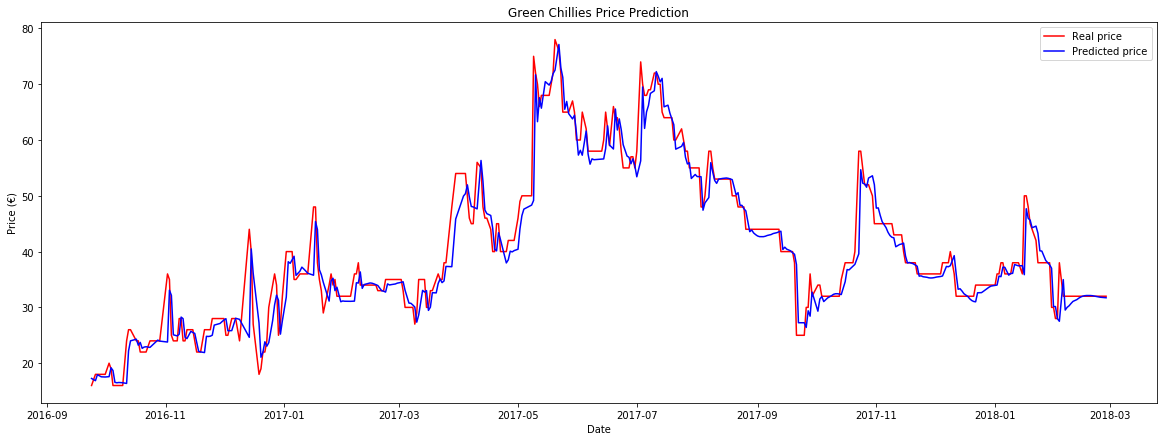

In [22]:
plt.figure(figsize=(20,7))
plt.plot(df['Date'].values[num_records:], df_volume[num_records:], color = 'red', label = 'Real price')
plt.plot(df['Date'][-predict.shape[0]:].values, predict, color = 'blue', label = 'Predicted price')
# plt.xticks(np.arange(0,df[1800:].shape[0],25), rotation=45)
plt.title('Green Chillies Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (€)')
plt.legend()
plt.show()

## 30-day prediction

In [23]:
pred_ = predict[-1].copy()
prediction_full = []
window = 30
df_copy = df.iloc[:, 1:2][1:].values

for j in range(30):
    df_ = np.vstack((df_copy, pred_))
    train_ = df_[:num_records]
    test_ = df_[num_records:]
    
    df_volume_ = np.vstack((train_, test_))

    inputs_ = df_volume_[df_volume_.shape[0] - test_.shape[0] - window:]
    inputs_ = inputs_.reshape(-1,1)
    inputs_ = sc.transform(inputs_)

    X_test_2 = []

    for k in range(window, num_2):
        X_test_3 = np.reshape(inputs_[k-window:k, 0], (window, 1))
        X_test_2.append(X_test_3)

    X_test_ = np.stack(X_test_2)
    predict_ = model.predict(X_test_)
    pred_ = sc.inverse_transform(predict_)
    prediction_full.append(pred_[-1][0])
    df_copy = df_[j:]

len(prediction_full)

30

In [24]:
prediction_full_new = np.vstack((predict, np.array(prediction_full).reshape(-1,1)))

len(prediction_full_new)

439

In [25]:
df_date = df[['Date']]

for h in range(30):
    df_date_add = pd.to_datetime(df_date['Date'].iloc[-1]) + pd.DateOffset(days=1)
    df_date_add = pd.DataFrame([df_date_add], columns=['Date'])
    df_date = df_date.append(df_date_add)
df_date = df_date.reset_index(drop=True)
len(df_date)

2076

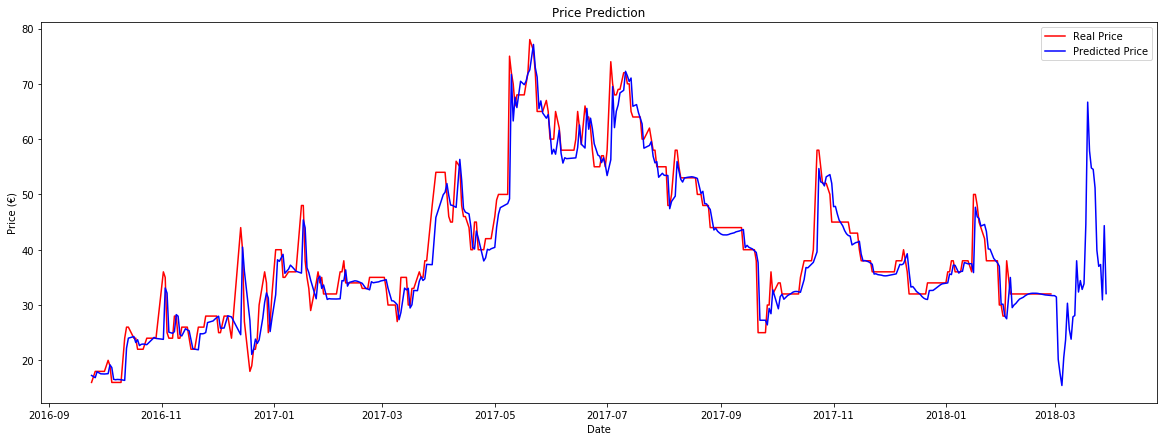

In [26]:
plt.figure(figsize=(20,7))
plt.plot(df['Date'].values[num_records:], df_volume[num_records:], color = 'red', label = 'Real Price')
plt.plot(df_date['Date'][-prediction_full_new.shape[0]:].values, prediction_full_new, color = 'blue', label = 'Predicted Price')
# plt.xticks(np.arange(0,df_date[1800:].shape[0],25), rotation=45)
plt.title('Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (€)')
plt.legend()
plt.show()

## GRU

In [27]:
# The GRU architecture
modelGRU = Sequential()

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
modelGRU.add(Dropout(0.2))

modelGRU.add(GRU(units=50))
modelGRU.add(Dropout(0.2))

modelGRU.add(Dense(units=1))
modelGRU.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 30, 50)            7950      
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 30, 50)            15300     
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
gru_2 (GRU)                  (None, 30, 50)            15300     
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
gru_3 (GRU)                  (None, 50)               

In [28]:
modelGRU.compile(optimizer='adam', loss='mse')
modelGRU.fit(X_train, y_train, epochs=500, batch_size=512)

Epoch 1/500
4/4 [==============================] - 14s 234ms/step - loss: 0.0332
Epoch 2/500
4/4 [==============================] - 1s 235ms/step - loss: 0.0149
Epoch 3/500
4/4 [==============================] - 1s 238ms/step - loss: 0.0072
Epoch 4/500
4/4 [==============================] - 1s 257ms/step - loss: 0.0086
Epoch 5/500
4/4 [==============================] - 1s 267ms/step - loss: 0.0053
Epoch 6/500
4/4 [==============================] - 1s 241ms/step - loss: 0.0054
Epoch 7/500
4/4 [==============================] - 1s 248ms/step - loss: 0.0045
Epoch 8/500
4/4 [==============================] - 1s 251ms/step - loss: 0.0046
Epoch 9/500
4/4 [==============================] - 1s 232ms/step - loss: 0.0045
Epoch 10/500
4/4 [==============================] - 1s 227ms/step - loss: 0.0038
Epoch 11/500
4/4 [==============================] - 1s 258ms/step - loss: 0.0039
Epoch 12/500
4/4 [==============================] - 1s 218ms/step - loss: 0.0035
Epoch 13/500
4/4 [==================

4/4 [==============================] - 1s 228ms/step - loss: 0.0022
Epoch 103/500
4/4 [==============================] - 1s 225ms/step - loss: 0.0022
Epoch 104/500
4/4 [==============================] - 1s 222ms/step - loss: 0.0020
Epoch 105/500
4/4 [==============================] - 1s 218ms/step - loss: 0.0020
Epoch 106/500
4/4 [==============================] - 1s 221ms/step - loss: 0.0021
Epoch 107/500
4/4 [==============================] - 1s 222ms/step - loss: 0.0020
Epoch 108/500
4/4 [==============================] - 1s 222ms/step - loss: 0.0021
Epoch 109/500
4/4 [==============================] - 1s 215ms/step - loss: 0.0020
Epoch 110/500
4/4 [==============================] - 1s 215ms/step - loss: 0.0019
Epoch 111/500
4/4 [==============================] - 1s 231ms/step - loss: 0.0020
Epoch 112/500
4/4 [==============================] - 1s 260ms/step - loss: 0.0022
Epoch 113/500
4/4 [==============================] - 1s 278ms/step - loss: 0.0020
Epoch 114/500
4/4 [===========

4/4 [==============================] - 1s 255ms/step - loss: 0.0018
Epoch 203/500
4/4 [==============================] - 1s 231ms/step - loss: 0.0018
Epoch 204/500
4/4 [==============================] - 1s 220ms/step - loss: 0.0018
Epoch 205/500
4/4 [==============================] - 1s 231ms/step - loss: 0.0017
Epoch 206/500
4/4 [==============================] - 1s 215ms/step - loss: 0.0016
Epoch 207/500
4/4 [==============================] - 1s 218ms/step - loss: 0.0018
Epoch 208/500
4/4 [==============================] - 1s 226ms/step - loss: 0.0016
Epoch 209/500
4/4 [==============================] - 1s 216ms/step - loss: 0.0017
Epoch 210/500
4/4 [==============================] - 1s 218ms/step - loss: 0.0018
Epoch 211/500
4/4 [==============================] - 1s 242ms/step - loss: 0.0016
Epoch 212/500
4/4 [==============================] - 1s 238ms/step - loss: 0.0016
Epoch 213/500
4/4 [==============================] - 1s 261ms/step - loss: 0.0016
Epoch 214/500
4/4 [===========

4/4 [==============================] - 1s 246ms/step - loss: 0.0018
Epoch 303/500
4/4 [==============================] - 1s 224ms/step - loss: 0.0016
Epoch 304/500
4/4 [==============================] - 1s 218ms/step - loss: 0.0015
Epoch 305/500
4/4 [==============================] - 1s 253ms/step - loss: 0.0016
Epoch 306/500
4/4 [==============================] - 1s 277ms/step - loss: 0.0016
Epoch 307/500
4/4 [==============================] - 1s 252ms/step - loss: 0.0016
Epoch 308/500
4/4 [==============================] - 1s 264ms/step - loss: 0.0015
Epoch 309/500
4/4 [==============================] - 1s 240ms/step - loss: 0.0015
Epoch 310/500
4/4 [==============================] - 1s 236ms/step - loss: 0.0016
Epoch 311/500
4/4 [==============================] - 1s 275ms/step - loss: 0.0016
Epoch 312/500
4/4 [==============================] - 1s 247ms/step - loss: 0.0014
Epoch 313/500
4/4 [==============================] - 1s 231ms/step - loss: 0.0016
Epoch 314/500
4/4 [===========

4/4 [==============================] - 1s 272ms/step - loss: 0.0015
Epoch 403/500
4/4 [==============================] - 1s 233ms/step - loss: 0.0015
Epoch 404/500
4/4 [==============================] - 1s 218ms/step - loss: 0.0016
Epoch 405/500
4/4 [==============================] - 1s 222ms/step - loss: 0.0015
Epoch 406/500
4/4 [==============================] - 1s 245ms/step - loss: 0.0014
Epoch 407/500
4/4 [==============================] - 1s 216ms/step - loss: 0.0015
Epoch 408/500
4/4 [==============================] - 1s 227ms/step - loss: 0.0015
Epoch 409/500
4/4 [==============================] - 1s 240ms/step - loss: 0.0015
Epoch 410/500
4/4 [==============================] - 1s 229ms/step - loss: 0.0016
Epoch 411/500
4/4 [==============================] - 1s 268ms/step - loss: 0.0015
Epoch 412/500
4/4 [==============================] - 1s 271ms/step - loss: 0.0015
Epoch 413/500
4/4 [==============================] - 1s 224ms/step - loss: 0.0014
Epoch 414/500
4/4 [===========

In [29]:
predict = modelGRU.predict(X_test)
predict = sc.inverse_transform(predict)

In [30]:
diff = predict - test

print("MSE:", np.mean(diff**2))
print("MAE:", np.mean(abs(diff)))
print("RMSE:", np.sqrt(np.mean(diff**2)))

MSE: 12.775205198010765
MAE: 2.133461245697693
RMSE: 3.5742419053571015


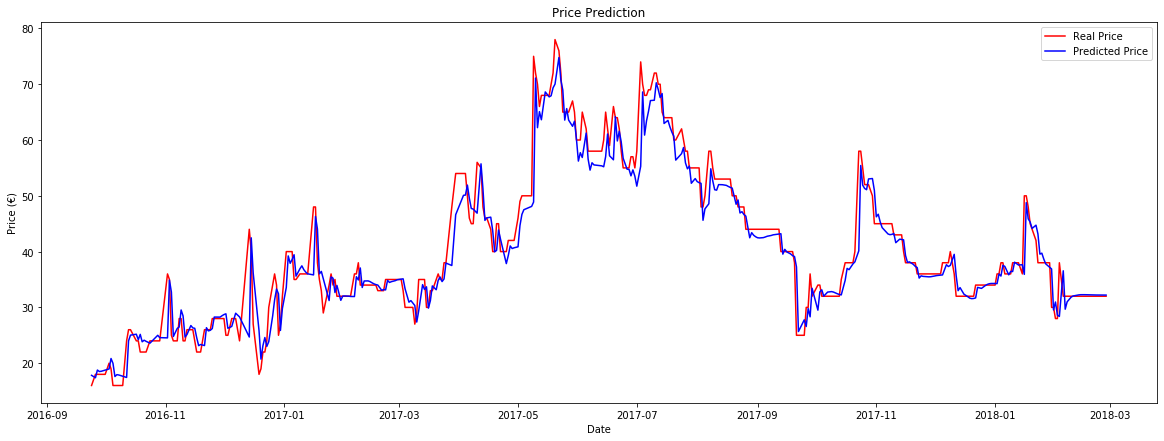

In [31]:
plt.figure(figsize=(20,7))
plt.plot(df['Date'].values[num_records:], df_volume[num_records:], color = 'red', label = 'Real Price')
plt.plot(df['Date'][-predict.shape[0]:].values, predict, color = 'blue', label = 'Predicted Price')
# plt.xticks(np.arange(0,df[num_records:].shape[0],25), rotation=45)
plt.title('Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (€)')
plt.legend()
plt.show()

## 30-day prediction

In [35]:
pred_ = predict[-1].copy()
prediction_full = []
window = 30
df_copy = df.iloc[:, 1:2][1:].values

for j in range(30):
    df_ = np.vstack((df_copy, pred_))
    train_ = df_[:num_records]
    test_ = df_[num_records:]
    
    df_volume_ = np.vstack((train_, test_))

    inputs_ = df_volume_[df_volume_.shape[0] - test_.shape[0] - window:]
    inputs_ = inputs_.reshape(-1,1)
    inputs_ = sc.transform(inputs_)

    X_test_2 = []

    for k in range(window, num_2):
        X_test_3 = np.reshape(inputs_[k-window:k, 0], (window, 1))
        X_test_2.append(X_test_3)

    X_test_ = np.stack(X_test_2)
    predict_ = modelGRU.predict(X_test_)
    pred_ = sc.inverse_transform(predict_)
    prediction_full.append(pred_[-1][0])
    df_copy = df_[j:]

In [36]:
prediction_full_new = np.vstack((predict, np.array(prediction_full).reshape(-1,1)))

df_date = df[['Date']]

for h in range(30):
    kk = pd.to_datetime(df_date['Date'].iloc[-1]) + pd.DateOffset(days=1)
    kk = pd.DataFrame([kk], columns=['Date'])
    df_date = df_date.append(kk)
df_date = df_date.reset_index(drop=True)

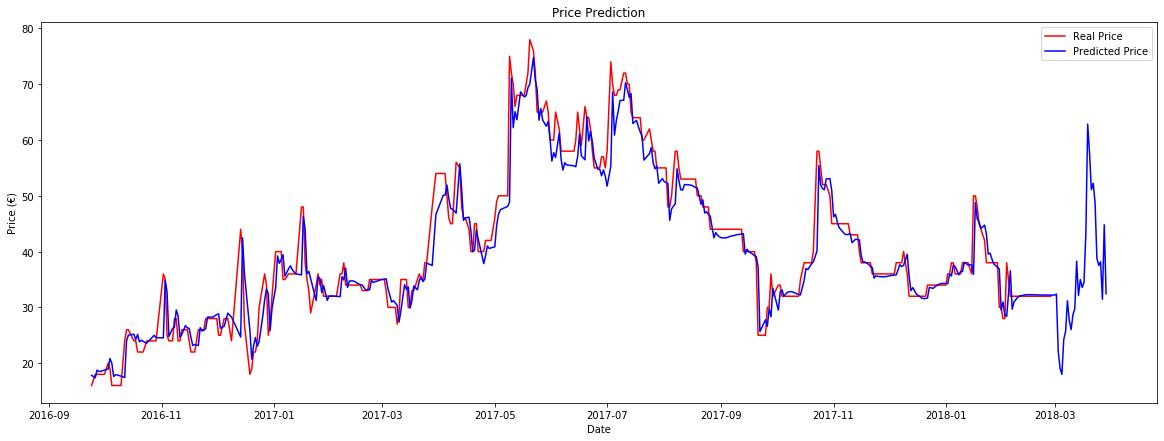

In [37]:
plt.figure(figsize=(20,7))
plt.plot(df['Date'].values[num_records:], df_volume[num_records:], color = 'red', label = 'Real Price')
plt.plot(df_date['Date'][-prediction_full_new.shape[0]:].values, prediction_full_new, color = 'blue', label = 'Predicted Price')
# plt.xticks(np.arange(0,df_date[1800:].shape[0],25), rotation=45)
plt.title('Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (€)')
plt.legend()
plt.show()